In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [13]:
no_stress = r"/kaggle/input/stress-non-stress-images/KDEF/KDEF/Train/NoStress"
stress = r"/kaggle/input/stress-non-stress-images/KDEF/KDEF/Train/Stress"

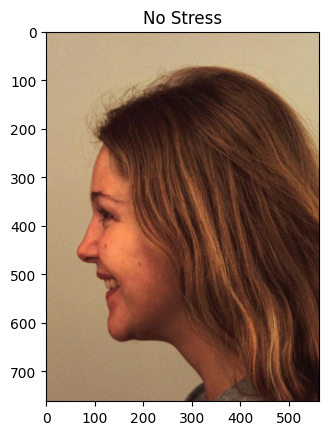

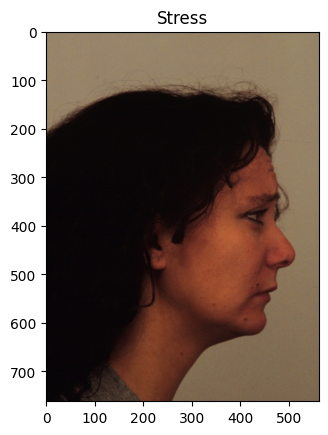

In [15]:
def Show_Img(path,title):
    for i in os.listdir(path):
        img = mpimg.imread(os.path.join(path, i))
        plt.imshow(img)
        plt.title(title)
        plt.show()
        break

Show_Img(no_stress,"No Stress")
Show_Img(stress,"Stress")

Number Of Images in Strees 2449 Number of Images is No Stress 1960


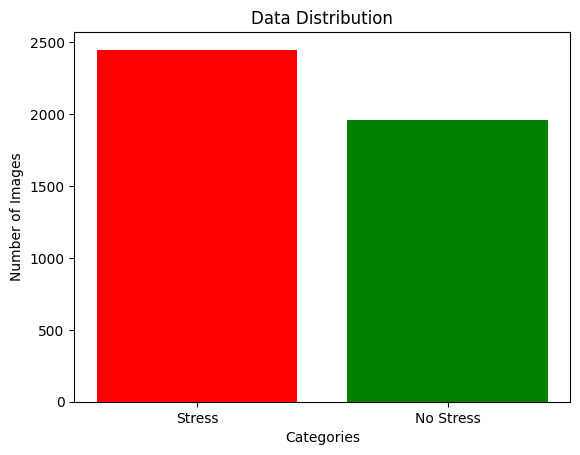

In [17]:
## Let's Check for the data Imbalance
stress_cnt = len(os.listdir(stress))
no_stress_cnt = len(os.listdir(no_stress))

print(f"Number Of Images in Strees {strees_cnt} Number of Images is No Stress {no_stress_cnt}")

categories = ['Stress', 'No Stress']
counts = [stress_cnt, no_stress_cnt]

plt.bar(categories, counts, color=['red', 'green'])
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Data Distribution')
plt.show()

### The is Not So Imbalanced So it's Ok to train our model to this data

# VGG16

In [26]:
val_no_stress = r"/kaggle/input/stress-non-stress-images/KDEF/KDEF/Test/NoStress"
val_stress = r"/kaggle/input/stress-non-stress-images/KDEF/KDEF/Test/Stress"

In [43]:
import numpy as np
from PIL import Image
import os

data_train = []
data_labels = []
val_data = []
val_labels = []

def CreateDataSet(path, label, t):
    for i in os.listdir(path):
        if i.endswith(('.png', '.JPG', '.jpeg')):
            img_path = os.path.join(path, i)
            img = Image.open(img_path)
            img = img.resize((224, 224))
            if t == "train":
                data_train.append(np.array(img) / 255.0)
                data_labels.append(label)
            elif t == "validation":
                val_data.append(np.array(img) / 255.0)
                val_labels.append(label)

CreateDataSet(no_stress, 0, "train")
CreateDataSet(stress, 1, "train")
CreateDataSet(val_no_stress, 0, "validation")
CreateDataSet(val_stress, 1, "validation")

In [44]:
print(f"len of train {len(data_train)}  and label {len(data_labels)}")
print(f"len of validation {len(val_data)}  and label {len(val_labels)}")

len of train 4409  and label 4409
len of validation 1889  and label 1889


In [45]:

print(f'First Image  Unique Pixel Value Value: {np.unique(data_train[0])} and label is: {data_labels[0]}')

First Image  Unique Pixel Value Value: [0.01960784 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569
 0.04313725 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451
 0.06666667 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451
 0.09019608 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392
 0.11372549 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333
 0.1372549  0.14117647 0.14509804 0.14901961 0.15294118 0.15686275
 0.16078431 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216
 0.18431373 0.18823529 0.19215686 0.19607843 0.2        0.20392157
 0.20784314 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098
 0.23137255 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039
 0.25490196 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098
 0.27843137 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922
 0.30196078 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863
 0.3254902  0.32941176 0.33333333 0.3372549  0.34117647 0.34509804
 0.34901961 0.35294118 0.

In [46]:

data_train = np.array(data_train)
data_labels = np.array(data_labels)

In [47]:
val_train  = np.array(val_data)
val_labels = np.array(val_labels)

In [48]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

In [49]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [50]:

base_model.trainable = False  ## we do not want to train the pre trained weights

vgg16 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [51]:
vgg16.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,334,657 (58.50 MB)

 Trainable params: 619,969 (2.36 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [53]:
vgg16.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
vgg16_train = vgg16.fit(data_train, data_labels,
                    validation_data=(val_train, val_labels),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 63s 327ms/step - accuracy: 0.5287 - loss: 0.6988 - val_accuracy: 0.5553 - val_loss: 0.6836
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 184ms/step - accuracy: 0.5513 - loss: 0.6828 - val_accuracy: 0.7051 - val_loss: 0.5872
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 26s 190ms/step - accuracy: 0.6918 - loss: 0.5980 - val_accuracy: 0.7607 - val_loss: 0.5103
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.7519 - loss: 0.5292 - val_accuracy: 0.7755 - val_loss: 0.4787
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 28s 203ms/step - accuracy: 0.7664 - loss: 0.4852 - val_accuracy: 0.7750 - val_loss: 0.4673
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 28s 203ms/step - accuracy: 0.7729 - loss: 0.4779 - val_accuracy: 0.7861 - val_loss: 0.4505
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 28s 206ms/step - accuracy: 0.7897 - loss: 0.4379 - val_accuracy: 0.8031 - val_loss: 0.4349
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 29s 210ms/step - accuracy: 0.7875 - loss: 0

In [109]:

train_accuracy_vgg16 = vgg16_train.history['accuracy']
val_accuracy_vgg16 = vgg16_train.history['val_accuracy']

print("Training Accuracy:", train_accuracy_vgg16[-1] * 100)
print("Validation Accuracy:", val_accuracy_vgg16[-1] * 100)

Training Accuracy: 79.99546527862549
Validation Accuracy: 80.67760467529297


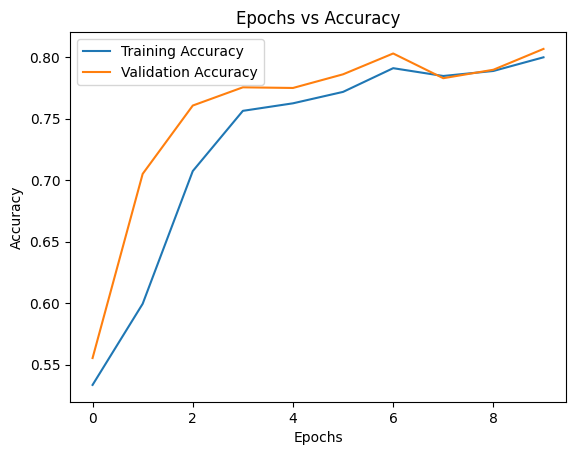

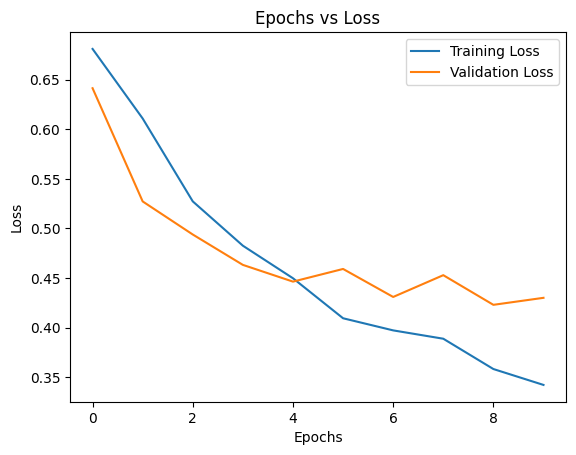

In [94]:
plt.plot(vgg16_train.history['accuracy'], label='Training Accuracy')
plt.plot(vgg16_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()


plt.plot(mobile_net_train.history['loss'], label='Training Loss')
plt.plot(mobile_net_train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step
Confusion Matrix:
[[548 292]
 [ 73 976]]


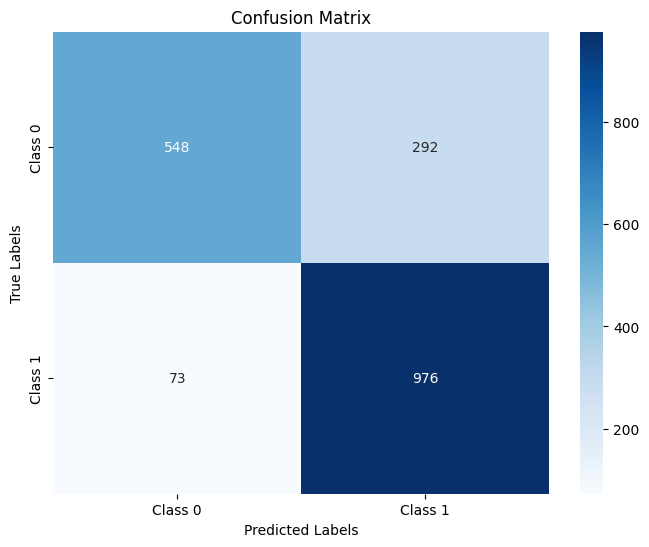


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       840
           1       0.77      0.93      0.84      1049

    accuracy                           0.81      1889
   macro avg       0.83      0.79      0.80      1889
weighted avg       0.82      0.81      0.80      1889



In [57]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred_prob = vgg16.predict(val_train)


y_pred = (y_pred_prob > 0.5).astype(int).flatten()


conf_matrix = confusion_matrix(val_labels, y_pred)


print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(val_labels, y_pred))

In [59]:
vgg16.save("Vgg16_Stress.keras")

# MobileNet

In [60]:
from tensorflow.keras.applications import MobileNetV2

In [61]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [63]:
base_model.trainable = False

mobile_net = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(), ## You can use max pool aur min pool 
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [64]:
mobile_net.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,008,513 (11.48 MB)

 Trainable params: 750,529 (2.86 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [65]:
mobile_net.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [66]:
mobile_net_train = mobile_net.fit(data_train, data_labels,
                    validation_data=(val_train, val_labels),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 33s 147ms/step - accuracy: 0.5569 - loss: 0.6912 - val_accuracy: 0.6109 - val_loss: 0.6414
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6603 - loss: 0.6243 - val_accuracy: 0.7321 - val_loss: 0.5272
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7275 - loss: 0.5442 - val_accuracy: 0.7522 - val_loss: 0.4939
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7564 - loss: 0.5062 - val_accuracy: 0.7835 - val_loss: 0.4632
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7904 - loss: 0.4445 - val_accuracy: 0.7914 - val_loss: 0.4464
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8151 - loss: 0.4030 - val_accuracy: 0.7729 - val_loss: 0.4591
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8241 - loss: 0.3935 - val_accuracy: 0.7962 - val_loss: 0.4309
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8188 - loss: 0.3915 - val_ac

In [110]:
train_accuracy_mobile_net = mobile_net_train.history['accuracy']
val_accuracy_mobile_net = mobile_net_train.history['val_accuracy']

print("Training Accuracy:", train_accuracy_mobile_net[-1] * 100)
print("Validation Accuracy:", val_accuracy_mobile_net[-1] * 100)

Training Accuracy: 85.1667046546936
Validation Accuracy: 80.30704259872437


### MobileNet Work Good On the Dataset Compare to Vgg16

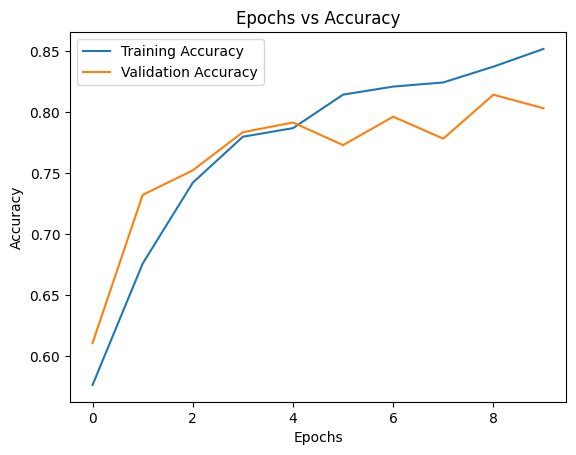

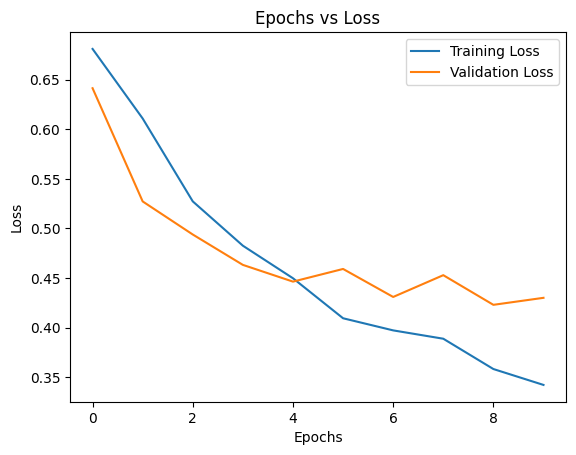

In [93]:
plt.plot(mobile_net_train.history['accuracy'], label='Training Accuracy')
plt.plot(mobile_net_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()


plt.plot(mobile_net_train.history['loss'], label='Training Loss')
plt.plot(mobile_net_train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step
Confusion Matrix:
[[678 162]
 [210 839]]


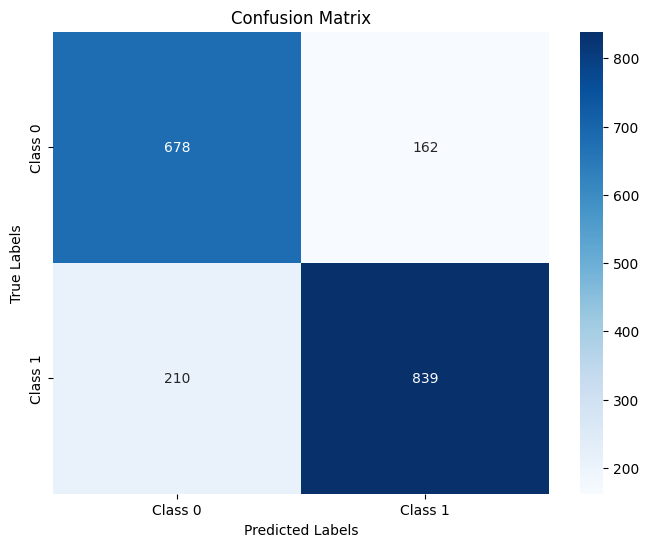


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       840
           1       0.84      0.80      0.82      1049

    accuracy                           0.80      1889
   macro avg       0.80      0.80      0.80      1889
weighted avg       0.80      0.80      0.80      1889



In [69]:
y_pred_prob = mobile_net.predict(val_train)


y_pred = (y_pred_prob > 0.5).astype(int).flatten()


conf_matrix = confusion_matrix(val_labels, y_pred)


print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(val_labels, y_pred))

In [70]:
mobile_net.save("MobileNet_Stress.keras")

# Inception

In [71]:
from tensorflow.keras.applications import InceptionV3

base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [83]:
base_model_inception.trainable = False

inception = models.Sequential([
    base_model_inception,
    layers.GlobalAveragePooling2D(),  
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  
    
])  

In [84]:
inception.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,946,529 (87.53 MB)

 Trainable params: 1,143,745 (4.36 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [86]:
inception.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [87]:
inception_train = inception.fit(data_train, data_labels,
                    validation_data=(val_train, val_labels),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 42s 202ms/step - accuracy: 0.5274 - loss: 0.7112 - val_accuracy: 0.5553 - val_loss: 0.6869
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.5478 - loss: 0.6894 - val_accuracy: 0.5553 - val_loss: 0.6862
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.5330 - loss: 0.6951 - val_accuracy: 0.5553 - val_loss: 0.6873
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.5520 - loss: 0.6873 - val_accuracy: 0.5553 - val_loss: 0.6779
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.5504 - loss: 0.6799 - val_accuracy: 0.6771 - val_loss: 0.6260
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.6558 - loss: 0.6231 - val_accuracy: 0.7247 - val_loss: 0.6059
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.7033 - loss: 0.5762 - val_accuracy: 0.7321 - val_loss: 0.5313
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.7369 - loss: 0.5122 -

In [111]:
train_accuracy_inception = inception_train.history['accuracy']
val_accuracy_inception = inception_train.history['val_accuracy']

print("Training Accuracy:", train_accuracy_inception[-1] * 100)
print("Validation Accuracy:", val_accuracy_inception[-1] * 100)

Training Accuracy: 77.09231376647949
Validation Accuracy: 75.17204880714417


- After Trying 3 Times with different Architecture of DL i got 77% otherwise getting [52- 55 ] %

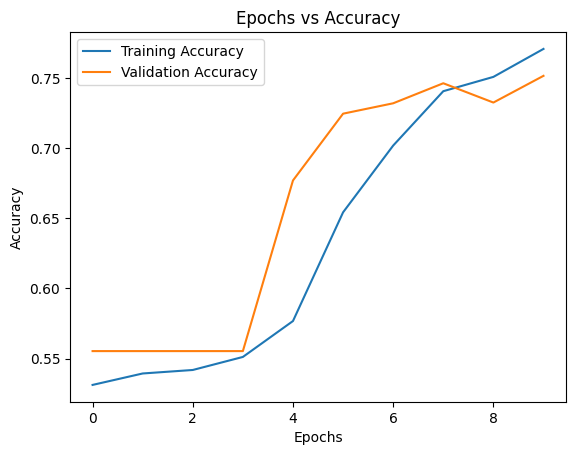

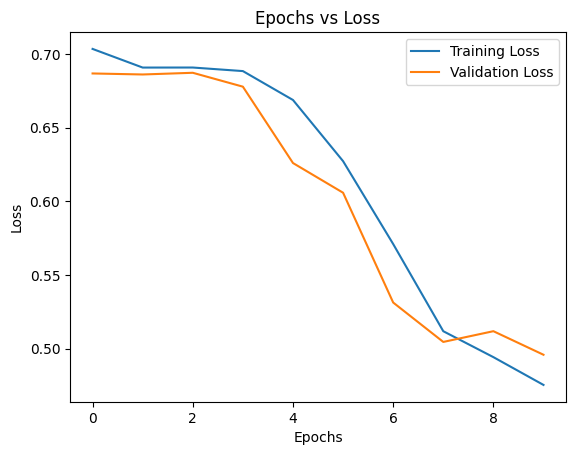

In [92]:
plt.plot(inception_train.history['accuracy'], label='Training Accuracy')
plt.plot(inception_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()


plt.plot(inception_train.history['loss'], label='Training Loss')
plt.plot(inception_train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step
Confusion Matrix:
[[569 271]
 [198 851]]


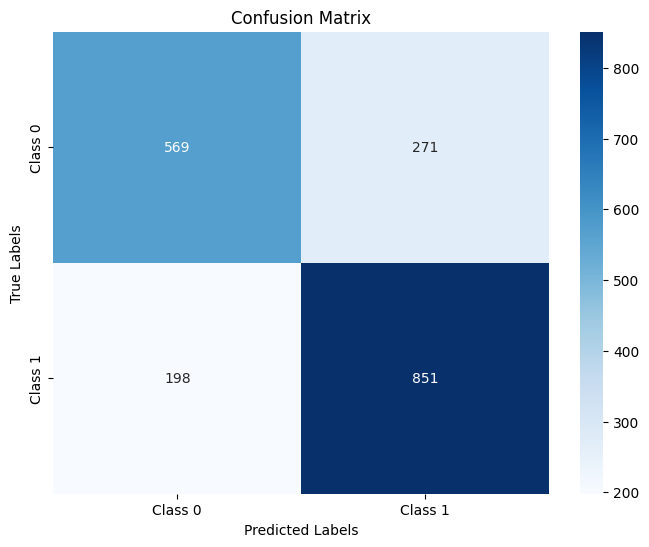


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       840
           1       0.76      0.81      0.78      1049

    accuracy                           0.75      1889
   macro avg       0.75      0.74      0.75      1889
weighted avg       0.75      0.75      0.75      1889



In [96]:
y_pred_prob = inception.predict(val_train)


y_pred = (y_pred_prob > 0.5).astype(int).flatten()


conf_matrix = confusion_matrix(val_labels, y_pred)


print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(val_labels, y_pred))

In [97]:
inception.save("Inception_Stress.keras")

# ResNet

In [99]:
from tensorflow.keras.applications import ResNet50

In [100]:
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [101]:
base_model_resnet.trainable = False

resnet = models.Sequential([
    base_model_resnet,
    layers.GlobalAveragePooling2D(), 
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [102]:
resnet.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,731,457 (94.34 MB)

 Trainable params: 1,143,745 (4.36 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [103]:
resnet.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [104]:
resnet_train = resnet.fit(data_train, data_labels,
                    validation_data=(val_train, val_labels),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 45s 221ms/step - accuracy: 0.5413 - loss: 0.7001 - val_accuracy: 0.5553 - val_loss: 0.6885
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - accuracy: 0.5415 - loss: 0.6900 - val_accuracy: 0.5553 - val_loss: 0.6872
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - accuracy: 0.5437 - loss: 0.6948 - val_accuracy: 0.5553 - val_loss: 0.6874
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - accuracy: 0.5519 - loss: 0.6893 - val_accuracy: 0.5553 - val_loss: 0.6885
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.5357 - loss: 0.6946 - val_accuracy: 0.5553 - val_loss: 0.6879
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.5540 - loss: 0.6890 - val_accuracy: 0.5553 - val_loss: 0.6876
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.5523 - loss: 0.6886 - val_accuracy: 0.5553 - val_loss: 0.6870
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 17s 125ms/step - accuracy: 0.5648 - loss: 0

In [112]:
train_accuracy_resnet = resnet_train.history['accuracy']
val_accuracy_resnet= resnet_train.history['val_accuracy']

print("Training Accuracy:", train_accuracy_resnet[-1] * 100)
print("Validation Accuracy:", val_accuracy_resnet[-1] * 100)

Training Accuracy: 55.45474886894226
Validation Accuracy: 55.532026290893555


- Not Going to Improve the Accuracy Try Yourself!!!

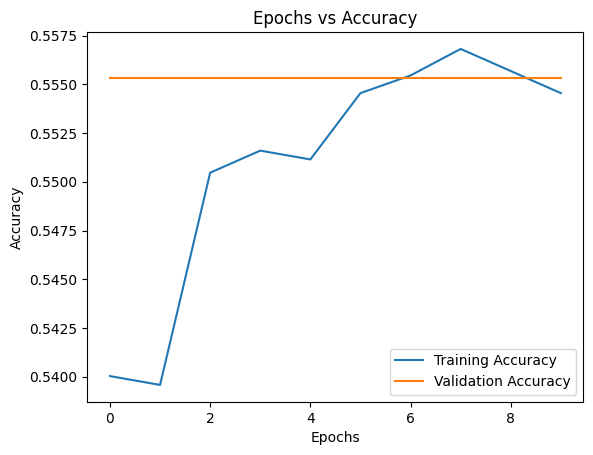

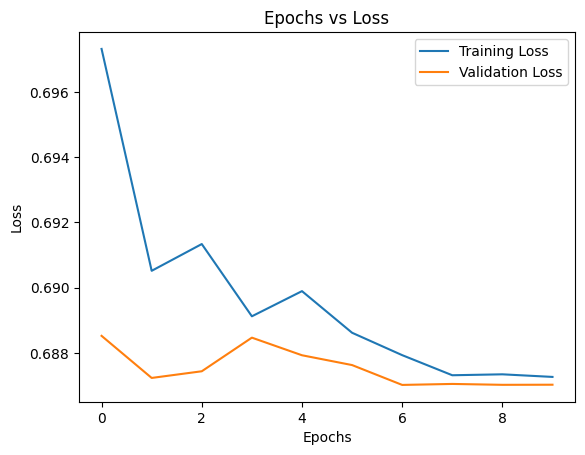

In [106]:
plt.plot(resnet_train.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()


plt.plot(resnet_train.history['loss'], label='Training Loss')
plt.plot(resnet_train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step
Confusion Matrix:
[[   0  840]
 [   0 1049]]


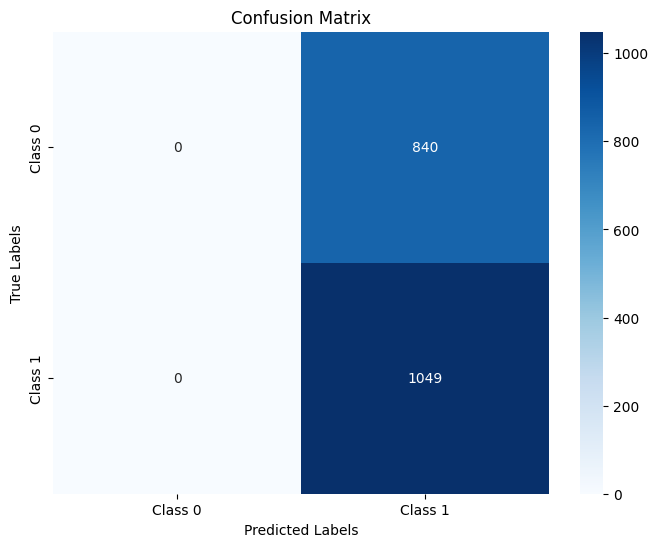


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       840
           1       0.56      1.00      0.71      1049

    accuracy                           0.56      1889
   macro avg       0.28      0.50      0.36      1889
weighted avg       0.31      0.56      0.40      1889



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
y_pred_prob = resnet.predict(val_train)


y_pred = (y_pred_prob > 0.5).astype(int).flatten()


conf_matrix = confusion_matrix(val_labels, y_pred)


print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(val_labels, y_pred))

## Something Wrong with the ResNet Try to Improve And also use the CNN to get the Accuracy

In [125]:
results = []

In [126]:
def GenerateTable(Name,Train,Valid):
    return results.append({
        "Model" : Name,
        "Training Accuracy" : Train,
        "Validation Accuracy" : Valid
    })
    

In [127]:
GenerateTable("VGG16",train_accuracy_vgg16[-1]*100,val_accuracy_vgg16[-1]*100)
GenerateTable("MobileNet",train_accuracy_mobile_net[-1]*100,val_accuracy_mobile_net[-1]*100)
GenerateTable("Inception",train_accuracy_inception[-1]*100,val_accuracy_inception[-1]*100)
GenerateTable("ResNet",train_accuracy_resnet[-1]*100,val_accuracy_resnet[-1]*100)

In [128]:
results

[{'Model': 'VGG16',
  'Training Accuracy': 79.99546527862549,
  'Validation Accuracy': 80.67760467529297},
 {'Model': 'MobileNet',
  'Training Accuracy': 85.1667046546936,
  'Validation Accuracy': 80.30704259872437},
 {'Model': 'Inception',
  'Training Accuracy': 77.09231376647949,
  'Validation Accuracy': 75.17204880714417},
 {'Model': 'ResNet',
  'Training Accuracy': 55.45474886894226,
  'Validation Accuracy': 55.532026290893555}]

In [130]:
import pandas as pd
df = pd.DataFrame(results)
df.head()

,Model,Training Accuracy,Validation Accuracy
0,VGG16,79.995465,80.677605
1,MobileNet,85.166705,80.307043
2,Inception,77.092314,75.172049
3,ResNet,55.454749,55.532026


In [132]:
df.to_csv("Accuracies.csv",index = False)

## Let's Load The Save Model to Predict on the data

In [133]:
from tensorflow.keras.models import load_model

In [134]:
model = load_model('/kaggle/working/MobileNet_Stress.keras')

In [138]:
def convert(img_path):
    lst = []
    img = Image.open(img_path)
    img = img.resize((224, 224))
    lst.append(np.array(img) / 255.0)
    return lst

lst = convert("/kaggle/input/stress-non-stress-images/KDEF/KDEF/Test/NoStress/AF04NEFL_updated.JPG")
lst = np.array(lst)


predicted = model.predict(lst)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [141]:
if(predicted[0][0] > 0.5):
    print("The Person have Stress")
else:
    print("The Person have No Stress")

The Person have No Stress
